In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data= pd.read_csv('/kaggle/input/housing-dataset/housing (1).csv', header= None, delimiter= r'\s+')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [3]:
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data= pd.read_csv('/kaggle/input/housing-dataset/housing (1).csv', header= None, delimiter= r'\s+', names= column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing_df= data.rename(columns={'MEDV': 'Price'})
housing_df.shape

(506, 14)

In [5]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing_df[housing_df['CRIM']==88.976200]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.9,17.21,10.4


In [7]:
housing_df[housing_df['NOX']==0.871000]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82,13.4
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403.0,14.7,396.90,26.42,15.6
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403.0,14.7,396.90,29.29,11.8
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403.0,14.7,169.27,16.65,15.6
147,2.36862,0.0,19.58,0,0.871,4.926,95.7,1.4608,5,403.0,14.7,391.71,29.53,14.6
148,2.33099,0.0,19.58,0,0.871,5.186,93.8,1.5296,5,403.0,14.7,356.99,28.32,17.8
149,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403.0,14.7,351.85,21.45,15.4
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403.0,14.7,372.80,14.10,21.5
151,1.49632,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403.0,14.7,341.60,13.28,19.6


In [8]:
housing_df[housing_df['Price']==50.000000]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0


<AxesSubplot:>

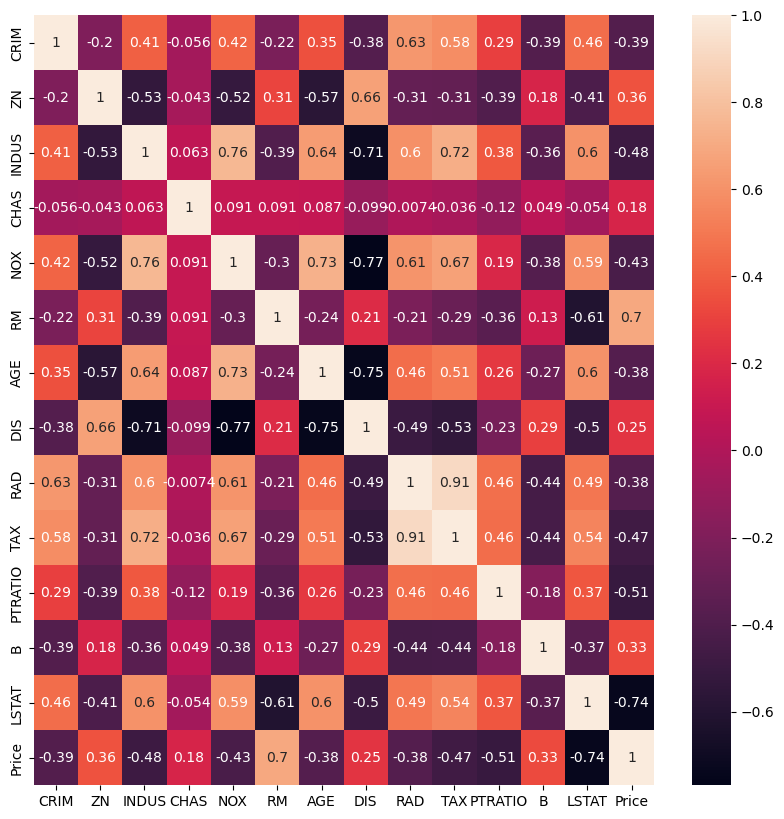

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(housing_df.corr(), annot= True)

In [10]:
housing_df.drop(columns= ['INDUS', 'B'], inplace= True)


In [11]:
features= housing_df.columns[0:11]
target= housing_df.columns[-1]
X= housing_df[features].values
Y= housing_df[target].values



In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size= 0.2)
print("Dimensions of X_train", X_train.shape)
print("Dimensions of X_test", X_test.shape)


Dimensions of X_train (404, 11)
Dimensions of X_test (102, 11)


In [13]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [14]:
X_train

array([[-0.40289048, -0.48492723, -0.27288841, ..., -1.08411314,
         0.82013939, -0.56579574],
       [-0.40212589,  3.19544097, -0.27288841, ..., -0.45745302,
        -2.61949451, -1.18110592],
       [-0.40020738, -0.48492723, -0.27288841, ..., -1.26912708,
        -0.26606079, -1.04776556],
       ...,
       [-0.40579048,  0.34315562, -0.27288841, ..., -0.65440335,
        -1.39751931, -1.05609934],
       [-0.39991781, -0.48492723, -0.27288841, ..., -1.26912708,
        -0.26606079,  0.07868264],
       [ 0.58987366, -0.48492723, -0.27288841, ...,  1.55382755,
         0.82013939,  1.53014795]])

In [15]:
lr= LinearRegression()
lr.fit(X_train, y_train)

training_score= lr.score(X_train, y_train)
test_score= lr.score(X_test, y_test)

print("train score ", training_score)
print("test score ", test_score)

train score  0.744905035602508
test score  0.6786327396837633


In [16]:
lr.intercept_

22.708663366336676

In [17]:
lr.n_features_in_

11

In [18]:
lr.coef_

array([-1.1194903 ,  0.84224567,  0.44993584, -2.1920352 ,  2.78092253,
        0.26473612, -2.90003918,  2.45223521, -1.92641062, -2.27662794,
       -3.91554751])

In [19]:
ridge_reg= Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
training_score= ridge_reg.score(X_train, y_train)
test_score= ridge_reg.score(X_test, y_test)

print("train score ", training_score)
print("test score ", test_score)

train score  0.7438457598063061
test score  0.67657937165247


In [20]:
ridge_reg= Ridge(alpha=100)
ridge_reg.fit(X_train, y_train)
training_score= ridge_reg.score(X_train, y_train)
test_score= ridge_reg.score(X_test, y_test)

print("train score ", training_score)
print("test score ", test_score)

train score  0.7193673026322083
test score  0.6499031351998742


In [21]:
ridge_reg.coef_

array([-0.76050442,  0.43407731,  0.47909743, -1.01780458,  2.88410522,
       -0.11249485, -1.32479664,  0.48685288, -0.73459124, -1.75571194,
       -3.01480894])

In [22]:
lasso= Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
training_score= lasso.score(X_train, y_train)
test_score= lasso.score(X_test, y_test)

print("train score ", training_score)
print("test score ", test_score)

train score  0.7449050299250857
test score  0.6786287023855342


In [23]:
from sklearn.linear_model import RidgeCV, LassoCV
ridge_cv= RidgeCV(alphas= [0.001, 0.1, 5, 10, 20, 100, 1000]).fit(X_train, y_train)
training_score= ridge_cv.score(X_train, y_train)
test_score= ridge_cv.score(X_test, y_test)

print("train score ", training_score)
print("test score ", test_score)

train score  0.7445900962509534
test score  0.6777799781946166


In [24]:
from sklearn.linear_model import RidgeCV, LassoCV
lasso_cv= LassoCV(alphas= [0.001, 0.1, 5, 10, 20, 100, 1000]).fit(X_train, y_train)
training_score= lasso_cv.score(X_train, y_train)
test_score= lasso_cv.score(X_test, y_test)

print("train score ", training_score)
print("test score ", test_score)

train score  0.7449044512988252
test score  0.6785909173789333


In [25]:
lasso_cv.alpha_

0.001

In [26]:
lasso_cv.coef_

array([-1.11637107,  0.83804741,  0.44954726, -2.18609801,  2.78323141,
        0.26066077, -2.89370828,  2.43820257, -1.91506166, -2.27502073,
       -3.91420951])

In [27]:
lr.coef_

array([-1.1194903 ,  0.84224567,  0.44993584, -2.1920352 ,  2.78092253,
        0.26473612, -2.90003918,  2.45223521, -1.92641062, -2.27662794,
       -3.91554751])

In [28]:
ridge_cv.alpha_

5.0

In [29]:
ridge_cv.coef_

array([-1.06852956,  0.77656553,  0.45887401, -2.05884706,  2.8345257 ,
        0.21925123, -2.72224842,  2.13430338, -1.67846853, -2.22846465,
       -3.84774877])